Investigar como realizar la siguiente aplicación sencilla en Arduino: Mediante el uso de las entradas analógicas de Arduino, leer la información de un potenciómetro y enviar ese dato vía comunicación serial. La siguiente página puede ser usado como referencia Lectura de un potenciometro con Arduino.

El dato recibido por comunicación serial se lo va a procesar con Python en donde se va a aplicar un filtro dado por la ecuación 

valor_filtrado = a * valor_sin_filtrar + (1 - a)*valor_filtrado_anterior

donde: a es una constante de 0 a 1 para regular el nivel del filtrado. Usando plots dinamicos se va a visualizar simultáneamente el valor sin filtrar y el valor filtrado.

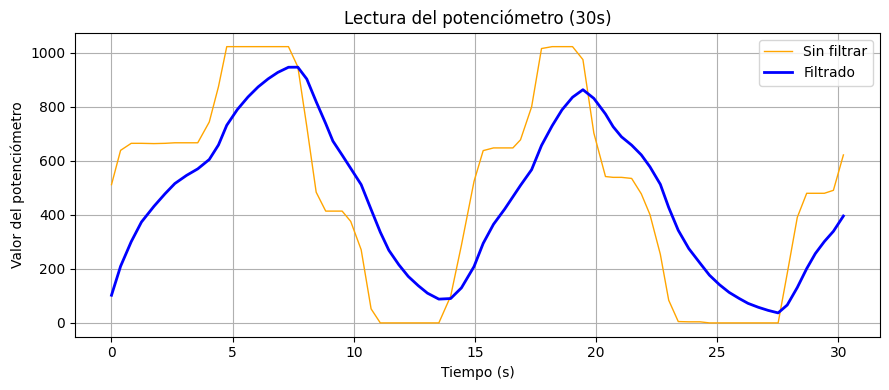

Lectura finalizada.


In [5]:
import serial
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

puerto = 'COM11'       
baudrate = 9600
duracion = 30          
a = 0.2                 

ser = serial.Serial(puerto, baudrate, timeout=1)
time.sleep(2) 

tiempos = []
valores_sin_filtrar = []
valores_filtrados = []

valor_filtrado_anterior = 0.0
t_inicio = time.time()
elapsed = 0.0

while elapsed < duracion:
    elapsed = time.time() - t_inicio
    linea = ser.readline().decode('utf-8').strip()
    
    if linea.isdigit(): 
        valor_sin_filtrar = int(linea)
        
        valor_filtrado = a * valor_sin_filtrar + (1 - a) * valor_filtrado_anterior
        valor_filtrado_anterior = valor_filtrado

        tiempos.append(elapsed)
        valores_sin_filtrar.append(valor_sin_filtrar)
        valores_filtrados.append(valor_filtrado)
        
        clear_output(wait=True)
        plt.figure(figsize=(9, 4))
        plt.plot(tiempos, valores_sin_filtrar, label='Sin filtrar', color='orange', linewidth=1)
        plt.plot(tiempos, valores_filtrados, label='Filtrado', color='blue', linewidth=2)
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Valor del potenciómetro')
        plt.title('Lectura del potenciómetro (30s)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
    time.sleep(0.1)

ser.close()
print("Lectura finalizada.")



1. **Importamos las librerías:**
- serial: sirve para comunicarse con el Arduino.
- time: permite medir el tiempo y hacer pausas.
- matplotlib.pyplot: se usa para crear las gráficas.
- clear_output: limpia la pantalla para que la gráfica se actualice sin abrir nuevas ventanas.

2. **Configuramos el puerto serial:**
Se define el puerto donde está conectado el Arduino, por ejemplo "COM11", y la velocidad de comunicación ("9600").

3. **Definimos variables importantes:**
- duracion = 30: tiempo total que durará el programa (en segundos).
- a = 0.2: controla cuánto se suaviza la señal. Si el valor de "a" es pequeño, la señal se verá más suave.

4. **Abrimos la conexión con el Arduino:**
Se usa serial.Serial(puerto, baudrate, timeout=1) para empezar a recibir los datos.  

5. **Creamos listas vacías:**
Aquí se guardan los datos que se van leyendo y procesando:
- tiempos: guarda el tiempo en segundos.
- valores_sin_filtrar: guarda los datos originales del potenciómetro.
- valores_filtrados: guarda los datos después de aplicar el filtro.

6. **Bucle principal:**
El programa corre durante 30 segundos. En cada vuelta del bucle:
- Lee el dato que llega del Arduino.
- Lo convierte a número entero.
- Aplica el filtro con la fórmula:
valor_filtrado = a * valor_sin_filtrar + (1 - a) * valor_filtrado_anterior
Esto hace que la señal se vea más estable y sin tanto ruido.

7. **Actualización de la gráfica:**
Cada vez que se recibe un nuevo dato, se actualiza la gráfica mostrando:
- En naranja, la señal sin filtrar.
- En azul, la señal filtrada.

8. **Fin del programa:**
Cuando pasan los 30 segundos, se cierra el puerto serial y la gráfica final muestra las dos señales juntas para comparar la diferencia.

